# Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [61]:
from sklearn.metrics import r2_score as r2_score_metric, mean_squared_error, mean_absolute_error
import numpy as np

def regression_report(y_true, y_pred):
    """Print key regression metrics and return the r2 score."""
    r2 = r2_score_metric(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"R2 Score: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    return r2


In [62]:
from sklearn.impute import SimpleImputer


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [64]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# EDA

In [65]:
import pandas as pd

# Try to use openpyxl explicitly for reading Excel files
try:
    df = pd.read_excel("Rangpur drought.xlsx", engine='openpyxl')
except ImportError as e:
    print("The 'openpyxl' library is required to read Excel files. Please install it using pip:\n\n    pip install openpyxl")
    raise e

# Keep only the records that contain the full hydro-meteorological context
if 'Year' in df.columns:
    df = df[df['Year'].notna()].reset_index(drop=True)

# Drop the Rainfall column because it is entirely empty in this dataset
if 'Rainfall' in df.columns and df['Rainfall'].isna().all():
    df = df.drop(columns=['Rainfall'])

# Remove any residual incomplete rows for the modelling features
required_cols = ['Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']
df = df.dropna(subset=[col for col in required_cols if col in df.columns]).reset_index(drop=True)

df.head()

,Year,Month,Humidity,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
0,1990.0,1.0,84.00,11.60,24.23,125.51,6.20,18.14,1.0,-1.262278,0.000000,0.0,0.0,0.0
1,1990.0,2.0,76.29,13.89,25.43,129.36,6.58,20.30,57.0,1.507233,0.000000,0.0,0.0,0.0
2,1990.0,3.0,72.52,16.52,27.95,146.21,7.23,26.88,82.0,1.667062,1.816228,0.0,0.0,0.0
3,1990.0,4.0,79.20,20.51,29.37,164.72,6.24,29.49,134.0,0.844219,1.711505,0.0,0.0,0.0
4,1990.0,5.0,83.03,23.68,31.84,143.77,6.81,27.46,354.0,0.857969,1.548284,0.0,0.0,0.0


In [66]:
df.tail()

,Year,Month,Humidity,Min Temp,Max Temp,Solar Radiation,Sunshine,PET,Precepitition,SPEI-1,SPEI-3,SPEI-6,SPEI-9,SPEI-12
391,2022.0,8.0,80.32,26.77,34.07,135.40,5.65,25.77,309.0,-0.538609,-0.806184,-0.706217,-0.506752,-0.696672
392,2022.0,9.0,84.20,26.04,32.82,138.47,4.34,24.68,164.0,-1.149704,-1.659237,-0.912190,-0.914815,-0.624512
393,2022.0,10.0,79.94,23.65,32.04,152.24,6.74,22.81,73.0,-0.915813,-1.449978,-1.355991,-1.091880,-1.172347
394,2022.0,11.0,76.83,18.44,30.09,137.20,8.65,20.99,0.0,-2.055389,-1.740311,-1.373583,-1.328967,-1.189064
395,2022.0,12.0,80.77,14.74,26.55,168.57,5.12,26.15,0.0,-1.338666,-1.531049,-1.823394,-1.213716,-1.206298


In [67]:
print(df.columns)

Index(['Year', 'Month', 'Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation',
       'Sunshine', 'PET', 'Precepitition', 'SPEI-1', 'SPEI-3', 'SPEI-6',
       'SPEI-9', 'SPEI-12'],
      dtype='object')


In [68]:
print(df.describe())

             Year       Month    Humidity    Min Temp    Max Temp  \
count   396.00000  396.000000  396.000000  396.000000  396.000000   
mean   2006.00000    6.500000   80.457980   20.433889   29.766818   
std       9.53395    3.456419    5.684693    5.342417    3.258428   
min    1990.00000    1.000000   61.580000    9.070000   20.270000   
25%    1998.00000    3.750000   77.612500   15.665000   27.980000   
50%    2006.00000    6.500000   81.295000   22.085000   31.055000   
75%    2014.00000    9.250000   84.620000   25.462500   32.142500   
max    2022.00000   12.000000   90.300000   27.310000   34.750000   

       Solar Radiation    Sunshine         PET  Precepitition      SPEI-1  \
count       396.000000  396.000000  396.000000     396.000000  396.000000   
mean        177.109040    5.981364   38.544924     181.148990    0.006228   
std          35.688189    1.634185   12.075606     202.872275    0.979938   
min          73.090000    1.730000   12.440000       0.000000   -2.379

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             396 non-null    float64
 1   Month            396 non-null    float64
 2   Humidity         396 non-null    float64
 3   Min Temp         396 non-null    float64
 4   Max Temp         396 non-null    float64
 5   Solar Radiation  396 non-null    float64
 6   Sunshine         396 non-null    float64
 7   PET              396 non-null    float64
 8   Precepitition    396 non-null    float64
 9   SPEI-1           396 non-null    float64
 10  SPEI-3           396 non-null    float64
 11  SPEI-6           396 non-null    float64
 12  SPEI-9           396 non-null    float64
 13  SPEI-12          396 non-null    float64
dtypes: float64(14)
memory usage: 43.4 KB
None


# Preprocessing

In [70]:
feature_columns = ['Humidity', 'Min Temp', 'Max Temp', 'Solar Radiation', 'Sunshine', 'PET', 'Precepitition']
features = df[feature_columns].copy()
targets = df['SPEI-12']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


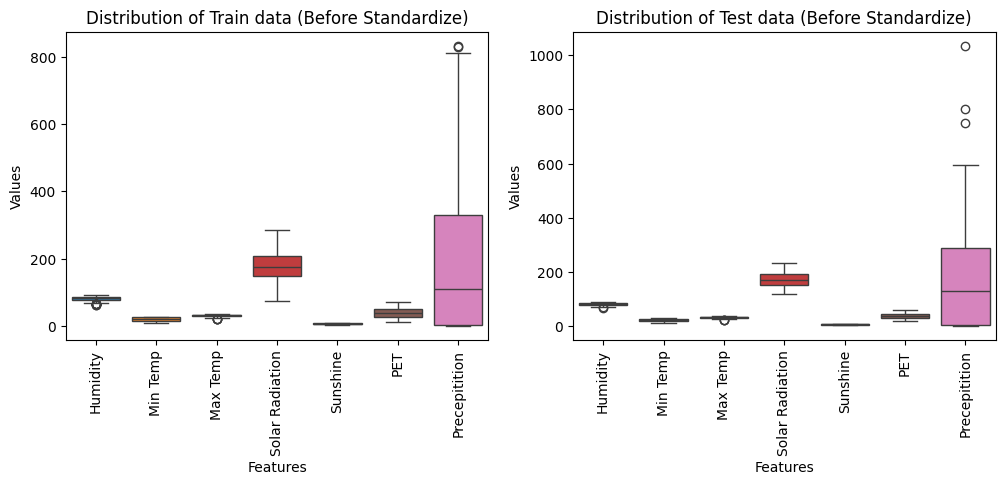

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title("Distribution of Train data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (Before Standardize)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

In [73]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
X_Train = scaler.fit_transform(features)
y_Train = targets

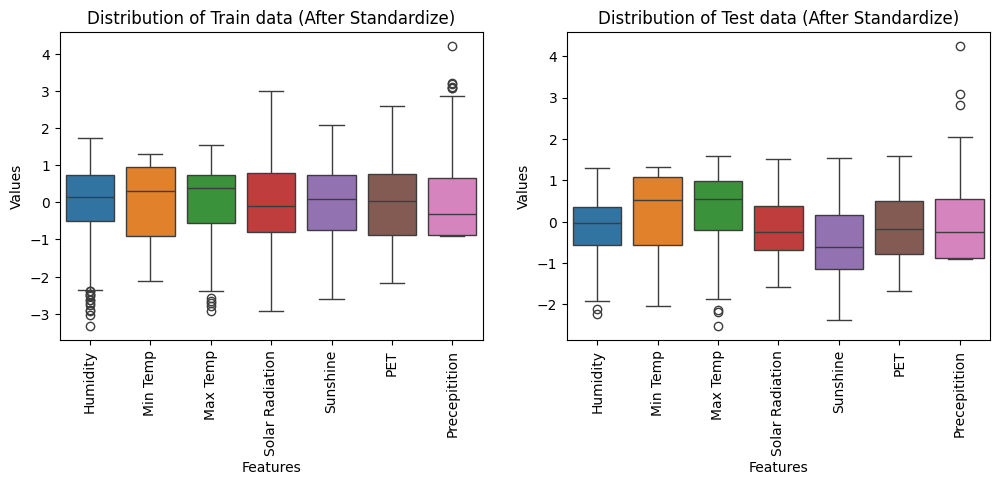

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(X_Train)
plt.title("Distribution of Train data (After Standardize)")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.subplot(1, 2, 2)
sns.boxplot(X_test)
plt.title("Distribution of Test data (After Standardize)")
plt.xlabel("Features")
plt.xticks(ticks=range(len(features.columns)), labels=features.columns, rotation=90)
plt.ylabel("Values")
plt.show()

# Linear Reg

In [76]:
linear_model = LinearRegression()
linear_model.fit(X_Train, y_Train)
y_pred = linear_model.predict(X_test)

In [77]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.1755
Root Mean Squared Error (RMSE): 1.0047
Mean Absolute Error (MAE): 0.8088
Accuracy Score: -0.1755


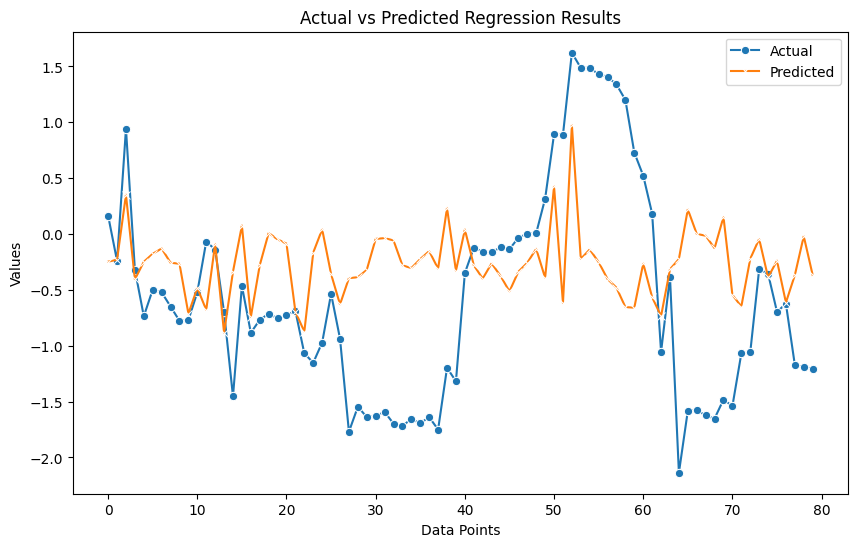

In [78]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Random Forest

In [79]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_Train, y_Train)
y_pred = random_forest_model.predict(X_test)

In [80]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.5030
Root Mean Squared Error (RMSE): 0.6533
Mean Absolute Error (MAE): 0.5217
Accuracy Score: 0.5030


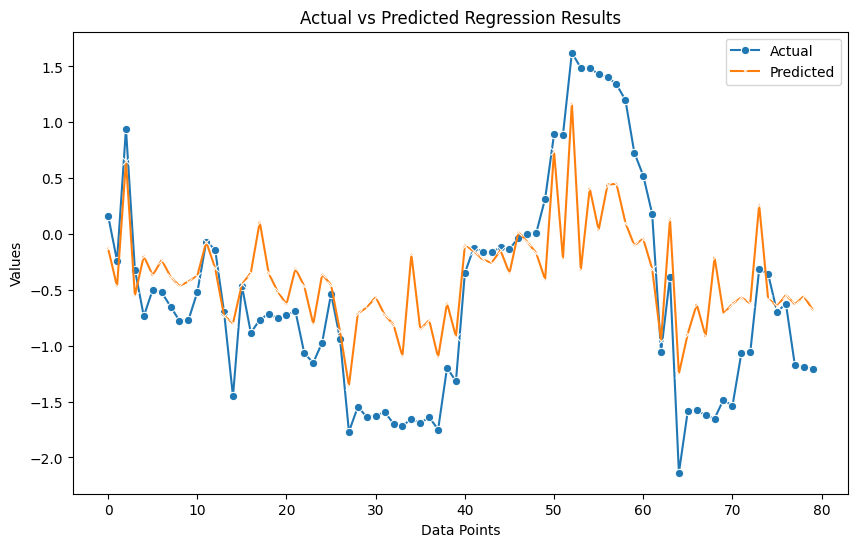

In [81]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Decision Tree

In [82]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_Train, y_Train)
y_pred = decision_tree_model.predict(X_test)

In [83]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.1376
Root Mean Squared Error (RMSE): 0.8606
Mean Absolute Error (MAE): 0.3986
Accuracy Score: 0.1376


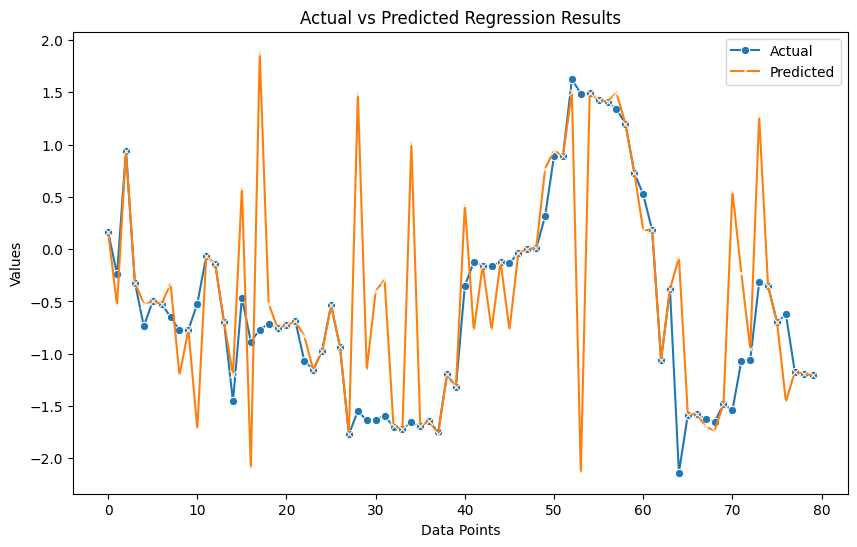

In [84]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SVR

In [85]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_Train, y_Train)
y_pred = svr_model.predict(X_test)

In [86]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.1308
Root Mean Squared Error (RMSE): 0.9855
Mean Absolute Error (MAE): 0.7865
Accuracy Score: -0.1308


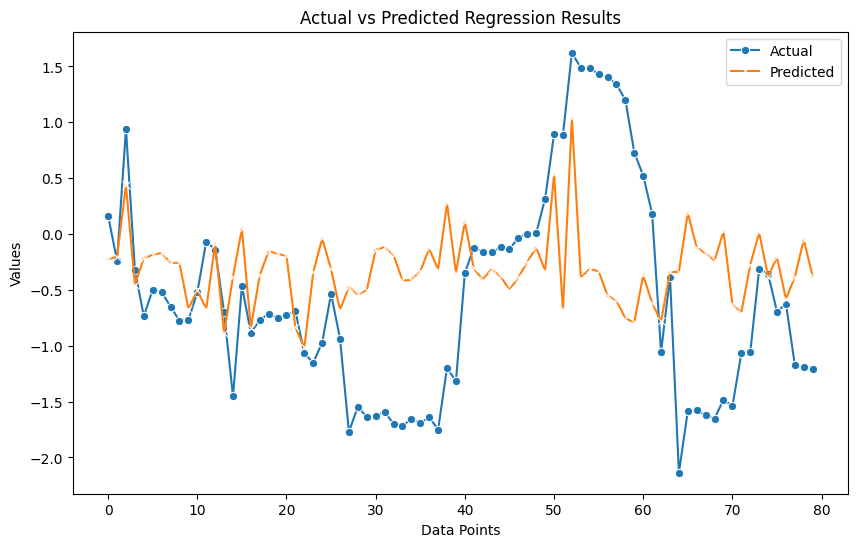

In [87]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# KNN

In [88]:
kneighbors_model = KNeighborsRegressor(n_neighbors=5)
kneighbors_model.fit(X_Train, y_Train)
y_pred = kneighbors_model.predict(X_test)

In [89]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: -0.0021
Root Mean Squared Error (RMSE): 0.9277
Mean Absolute Error (MAE): 0.7373
Accuracy Score: -0.0021


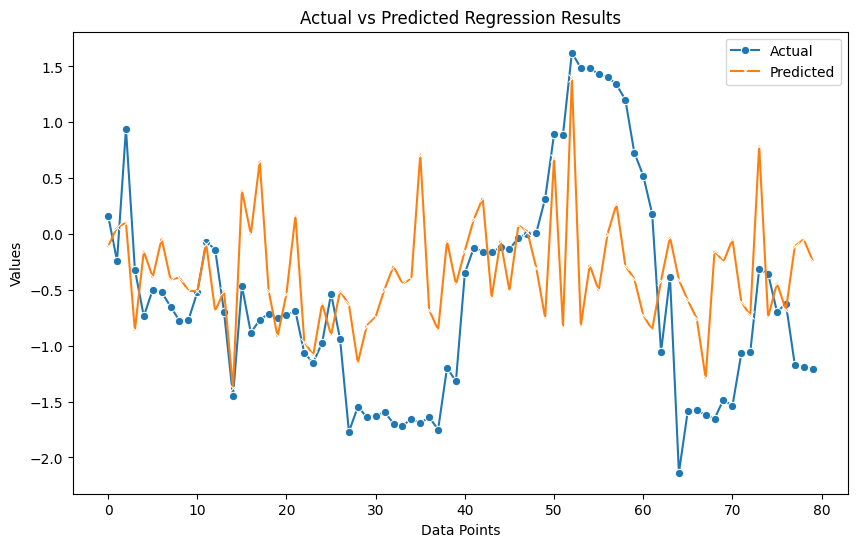

In [90]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# ANN

In [91]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


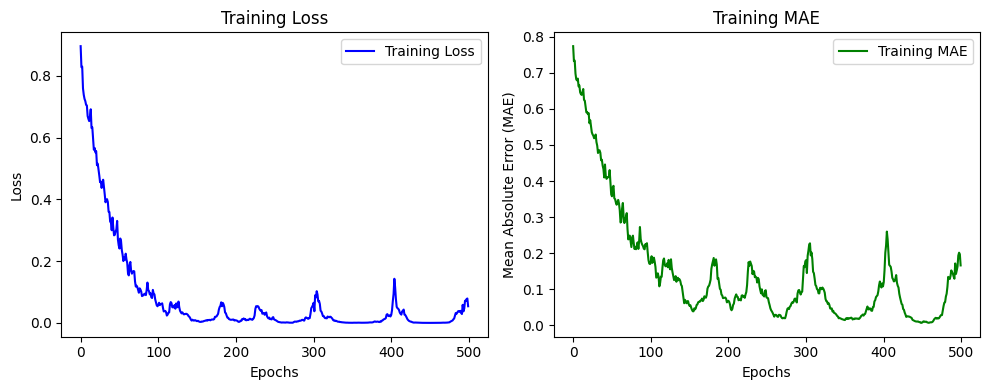

In [92]:
# Retrieve training history
history_dict = history.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [93]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [94]:
accuracy_score = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score:.4f}")

R2 Score: 0.9265
Root Mean Squared Error (RMSE): 0.2512
Mean Absolute Error (MAE): 0.1775
Accuracy Score: 0.9265


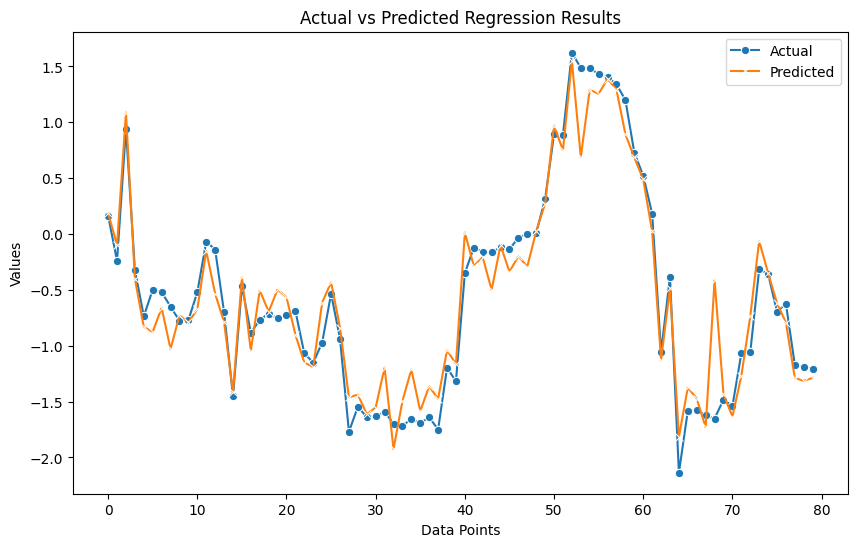

In [95]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-1

In [96]:
features = df[feature_columns].copy()
targets = df['SPEI-1']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [98]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [100]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi1 = model1.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


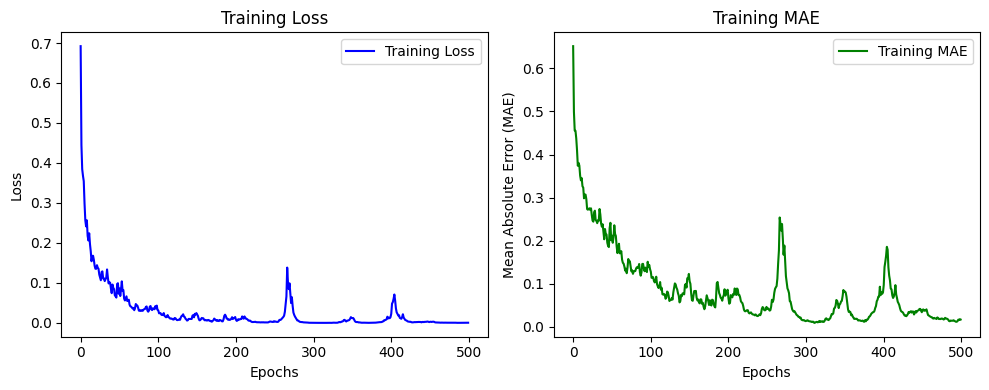

In [101]:
# Retrieve training history
history_dict = history_spi1.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [102]:
y_pred = model1.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score1 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score1:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
R2 Score: 0.9904
Root Mean Squared Error (RMSE): 0.1062
Mean Absolute Error (MAE): 0.0868
Accuracy Score: 0.9904


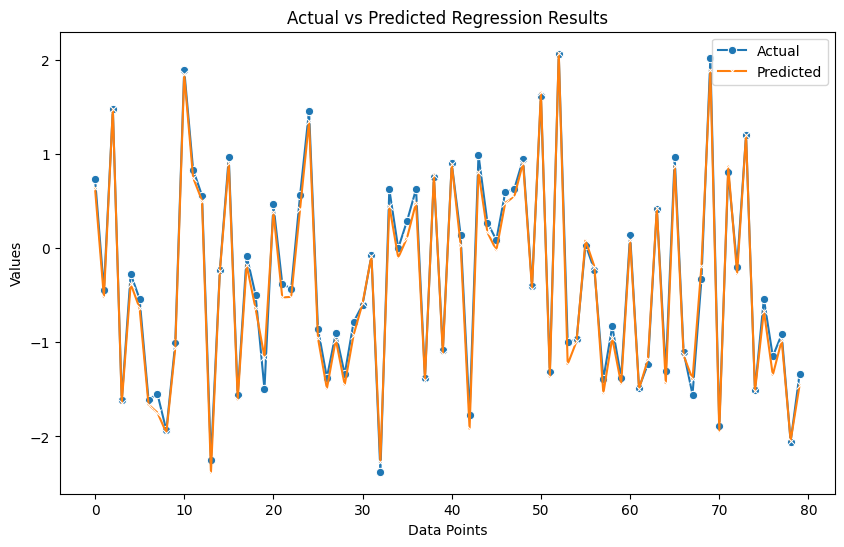

In [103]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-3

In [104]:
features = df[feature_columns].copy()
targets = df['SPEI-3']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [106]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [108]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi3 = model3.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


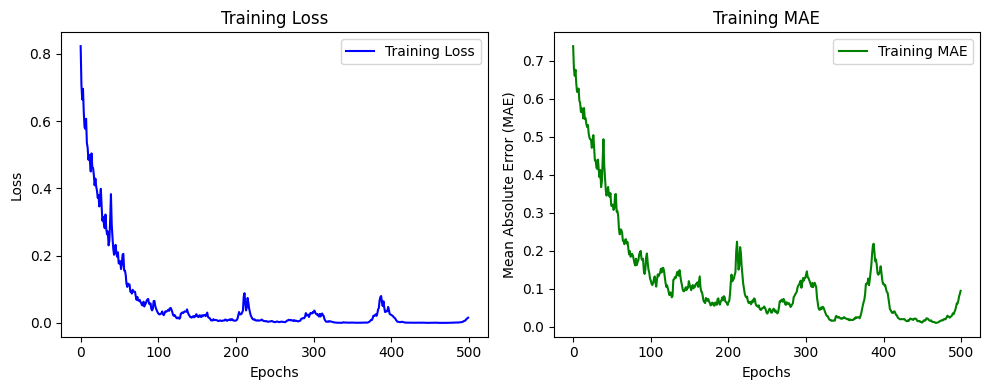

In [109]:
# Retrieve training history
history_dict = history_spi3.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [110]:
y_pred = model3.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score3 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score3:.4f}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000147A6D777E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
R2 Score: 0.9643
Root Mean Squared Error (RMSE): 0.1891
Mean Absolute Error (MAE): 0.1380
Accuracy Score: 0.9643


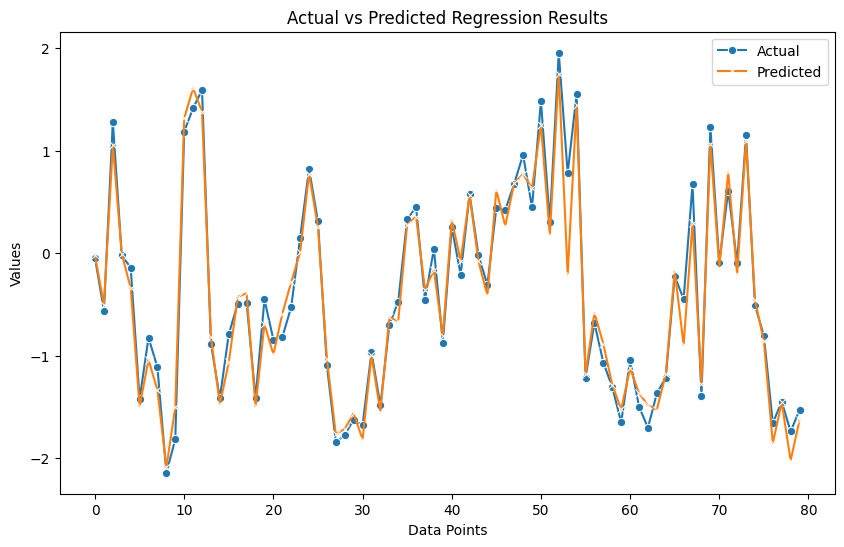

In [111]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-6

In [112]:
features = df[feature_columns].copy()
targets = df['SPEI-6']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [114]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [116]:
model6 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi6 = model6.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


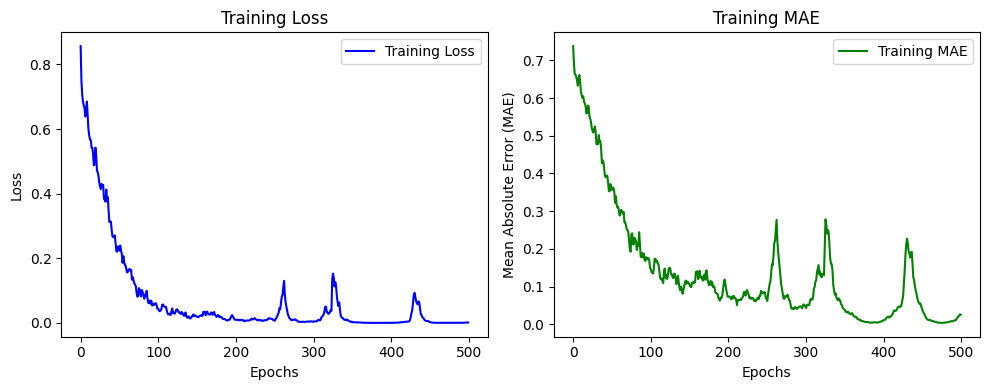

In [117]:
# Retrieve training history
history_dict = history_spi6.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
y_pred = model6.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score6 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score6:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
R2 Score: 0.9688
Root Mean Squared Error (RMSE): 0.1760
Mean Absolute Error (MAE): 0.1269
Accuracy Score: 0.9688


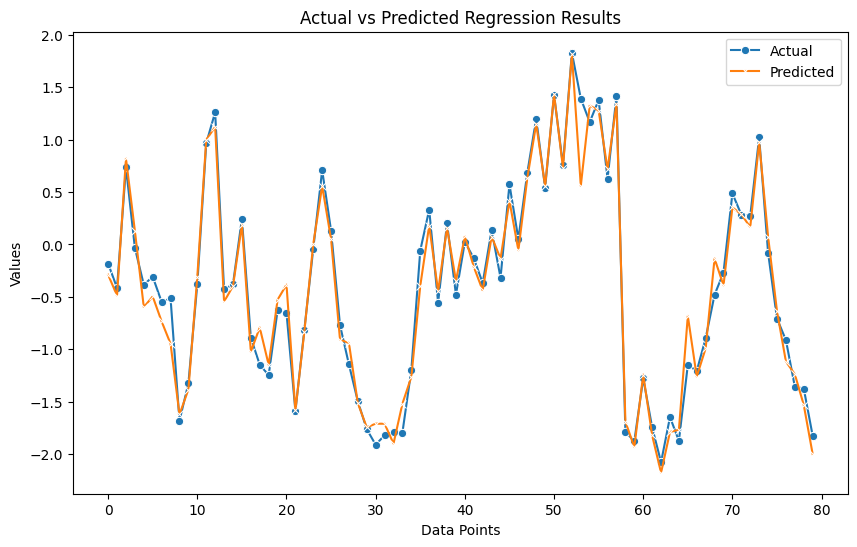

In [119]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-9

In [120]:
features = df[feature_columns].copy()
targets = df['SPEI-9']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [122]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [124]:
model9 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model9.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi9 = model9.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


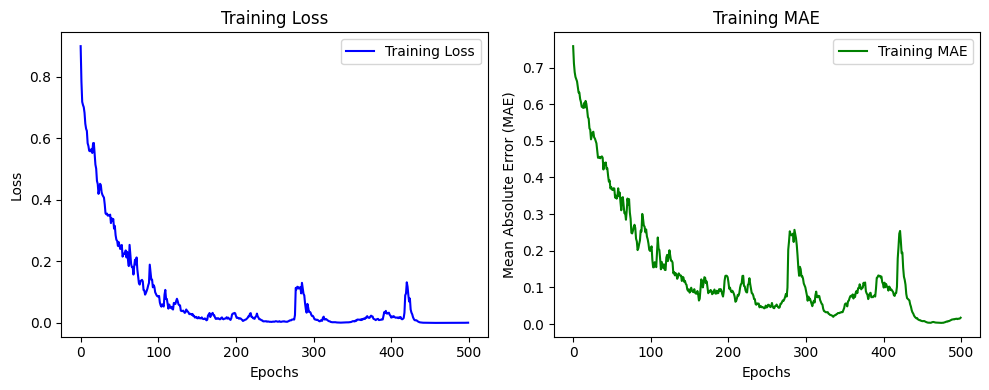

In [125]:
# Retrieve training history
history_dict = history_spi9.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
y_pred = model9.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score9 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score9:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
R2 Score: 0.9573
Root Mean Squared Error (RMSE): 0.1969
Mean Absolute Error (MAE): 0.1284
Accuracy Score: 0.9573


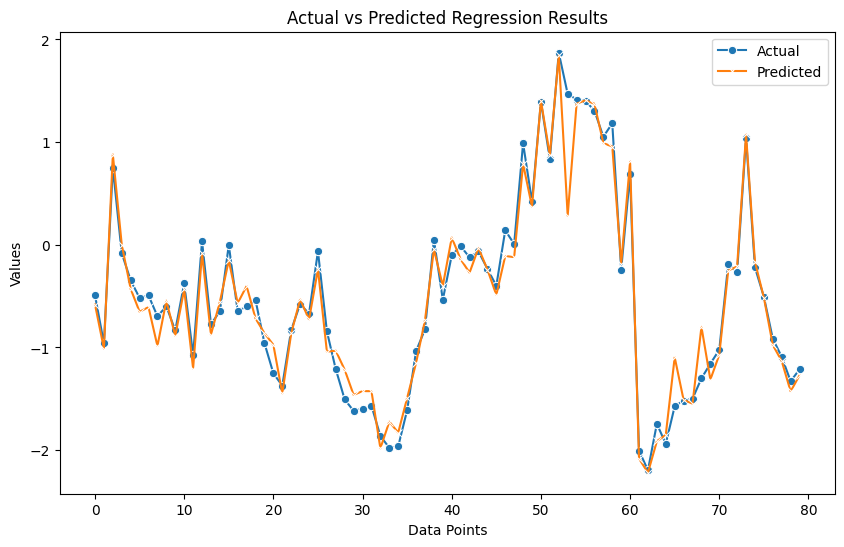

In [127]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# SPI-12

In [128]:
features = df[feature_columns].copy()
targets = df['SPEI-12']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, shuffle=False)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 7)
X_test shape: (80, 7)


In [130]:
scaler = StandardScaler()
X_eval = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
X_Train = scaler.fit_transform(features)
y_Train = targets

In [132]:
model12 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model12.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_spi12 = model12.fit(X_Train, y_Train, epochs=500, batch_size=32, verbose=0)


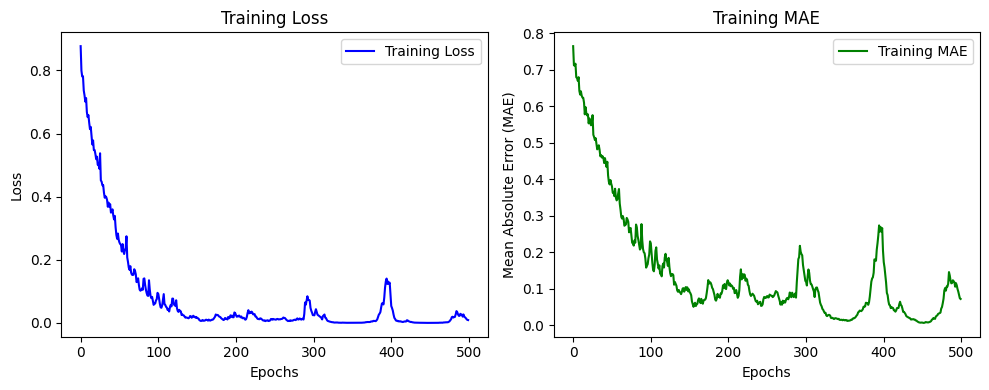

In [133]:
# Retrieve training history
history_dict = history_spi12.history

# Extract loss and metric (e.g., MAE) values
loss = history_dict['loss']
mae = history_dict['mae']

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [134]:
y_pred = model12.predict(X_test)
y_pred = y_pred.flatten()
accuracy_score12 = regression_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy_score12:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
R2 Score: 0.9552
Root Mean Squared Error (RMSE): 0.1962
Mean Absolute Error (MAE): 0.1290
Accuracy Score: 0.9552


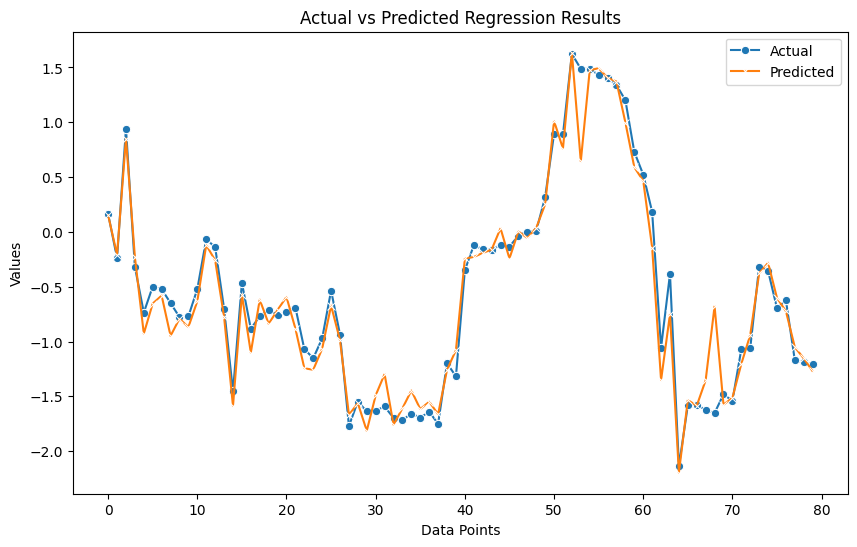

In [135]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", marker="o")
sns.lineplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker="x")

plt.title("Actual vs Predicted Regression Results")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()

plt.show()

# Summary

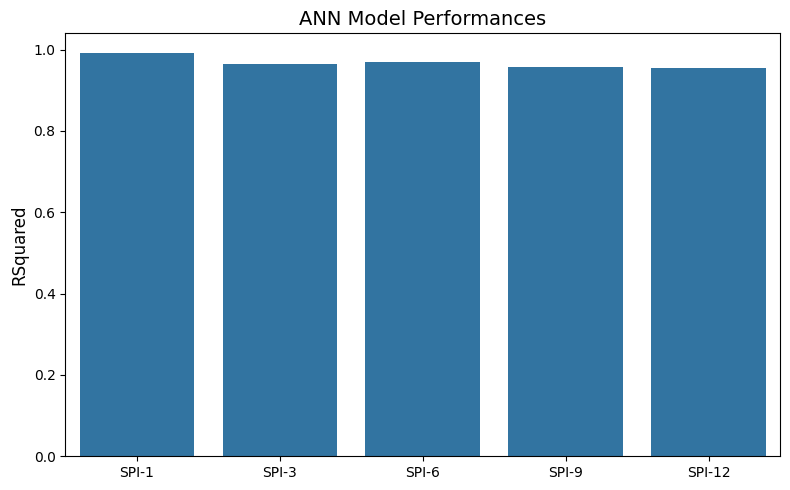

In [136]:
categories = ['SPI-1', 'SPI-3', 'SPI-6', 'SPI-9', 'SPI-12']
values = [accuracy_score1, accuracy_score3, accuracy_score6, accuracy_score9, accuracy_score12]

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values)

# Add title and labels
plt.title('ANN Model Performances', fontsize=14)
plt.ylabel('RSquared', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()